# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_mypertamina_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,1,2024-08-25 17:53:49,Sudah berkali2 daftar tapi balik lagi ke awal ...
1,Pengguna Google,5,2024-08-25 15:48:57,Sangat mebamtu my pertamina
2,Pengguna Google,1,2024-08-25 15:38:04,baru daftar upload KTP keterangannya nik tidak...
3,Pengguna Google,5,2024-08-25 15:23:34,Baik
4,Pengguna Google,5,2024-08-25 15:14:10,Good


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Sudah berkali2 daftar tapi balik lagi ke awal ...
1,Sangat mebamtu my pertamina
2,baru daftar upload KTP keterangannya nik tidak...
3,Baik
4,Good
...,...
2495,"Perlu Perbaikan dan layanan aplikasi nya,"
2496,Gagal masuk
2497,Jelek masak verifikasi sampek 3 tahun
2498,Bagusnya d tampilkan info ketersediaan jenis b...


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2499 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2499
unique,1888
top,mantap
freq,85


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1888, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

<ipython-input-14-593aa74adfad>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()


,content,cleaning
0,Sudah berkali2 daftar tapi balik lagi ke awal ...,sudah berkali daftar tapi balik lagi ke awal d...
1,Sangat mebamtu my pertamina,sangat mebamtu my pertamina
2,baru daftar upload KTP keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...
3,Baik,baik
4,Good,good
...,...,...
2495,"Perlu Perbaikan dan layanan aplikasi nya,",perlu perbaikan dan layanan aplikasi nya
2496,Gagal masuk,gagal masuk
2497,Jelek masak verifikasi sampek 3 tahun,jelek masak verifikasi sampek tahun
2498,Bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Sudah berkali2 daftar tapi balik lagi ke awal ...,sudah berkali daftar tapi balik lagi ke awal d...,sudah berkali daftar tapi balik lagi ke awal d...
1,Sangat mebamtu my pertamina,sangat mebamtu my pertamina,sangat mebamtu my pertamina
2,baru daftar upload KTP keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...
3,Baik,baik,baik
4,Good,good,good
...,...,...,...
2495,"Perlu Perbaikan dan layanan aplikasi nya,",perlu perbaikan dan layanan aplikasi nya,perlu perbaikan dan layanan aplikasi nya
2496,Gagal masuk,gagal masuk,gagal masuk
2497,Jelek masak verifikasi sampek 3 tahun,jelek masak verifikasi sampek tahun,jelek masak verifikasi sampek tahun
2498,Bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Sudah berkali2 daftar tapi balik lagi ke awal ...,sudah berkali daftar tapi balik lagi ke awal d...,sudah berkali daftar tapi balik lagi ke awal d...,berkali daftar balik ke awal daftar lagiverifi...
1,Sangat mebamtu my pertamina,sangat mebamtu my pertamina,sangat mebamtu my pertamina,mebamtu my pertamina
2,baru daftar upload KTP keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...,baru daftar upload ktp keterangannya nik terli...
3,Baik,baik,baik,baik
4,Good,good,good,good
...,...,...,...,...
2495,"Perlu Perbaikan dan layanan aplikasi nya,",perlu perbaikan dan layanan aplikasi nya,perlu perbaikan dan layanan aplikasi nya,perlu perbaikan layanan aplikasi
2496,Gagal masuk,gagal masuk,gagal masuk,gagal masuk
2497,Jelek masak verifikasi sampek 3 tahun,jelek masak verifikasi sampek tahun,jelek masak verifikasi sampek tahun,jelek masak verifikasi sampek tahun
2498,Bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Sudah berkali2 daftar tapi balik lagi ke awal ...,sudah berkali daftar tapi balik lagi ke awal d...,sudah berkali daftar tapi balik lagi ke awal d...,berkali daftar balik ke awal daftar lagiverifi...,"[berkali, daftar, balik, ke, awal, daftar, lag..."
1,Sangat mebamtu my pertamina,sangat mebamtu my pertamina,sangat mebamtu my pertamina,mebamtu my pertamina,"[mebamtu, my, pertamina]"
2,baru daftar upload KTP keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...,baru daftar upload ktp keterangannya nik tidak...,baru daftar upload ktp keterangannya nik terli...,"[baru, daftar, upload, ktp, keterangannya, nik..."
3,Baik,baik,baik,baik,[baik]
4,Good,good,good,good,[good]
...,...,...,...,...,...
2495,"Perlu Perbaikan dan layanan aplikasi nya,",perlu perbaikan dan layanan aplikasi nya,perlu perbaikan dan layanan aplikasi nya,perlu perbaikan layanan aplikasi,"[perlu, perbaikan, layanan, aplikasi]"
2496,Gagal masuk,gagal masuk,gagal masuk,gagal masuk,"[gagal, masuk]"
2497,Jelek masak verifikasi sampek 3 tahun,jelek masak verifikasi sampek tahun,jelek masak verifikasi sampek tahun,jelek masak verifikasi sampek tahun,"[jelek, masak, verifikasi, sampek, tahun]"
2498,Bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,bagusnya d tampilkan info ketersediaan jenis b...,"[bagusnya, d, tampilkan, info, ketersediaan, j..."


# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_mypertamina_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_mypertamina_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,kali daftar balik ke awal daftar lagiverifikas...
1,bantu my pertamina
2,baru daftar upload ktp terang nik lihat gagal ...
3,baik
4,good
...,...
1883,perlu baik layan aplikasi
1884,gagal masuk
1885,jelek masak verifikasi sampek tahun
1886,bagus d tampil info sedia jenis bbm sedia tiap...


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

# # Import Library yang dibutuhkan

# import pandas as pd
# from easynmt import EasyNMT

# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_NGL_1.csv', encoding = 'latin1')

# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

# # Load Model EasyMNT
# model = EasyNMT('opus-mt')  # You can choose a different model name here

# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')

# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_NGL_1.csv')

In [22]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_mypertamina_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...
1,bantu my pertamina,help my pertamine
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...
3,baik,Okay.
4,good,good
...,...,...
1883,perlu baik layan aplikasi,needs both application layer
1884,gagal masuk,failed to get in.
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.
1886,bagus d tampil info sedia jenis bbm sedia tiap...,"fontcolor="" # FFFF00""goodshow fontcolor="" # FF..."


# **Labeling**

In [23]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_mypertamina_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...
1,bantu my pertamina,help my pertamine
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...
3,baik,Okay.
4,good,good
...,...,...
1883,perlu baik layan aplikasi,needs both application layer
1884,gagal masuk,failed to get in.
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.
1886,bagus d tampil info sedia jenis bbm sedia tiap...,"fontcolor="" # FFFF00""goodshow fontcolor="" # FF..."


In [24]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [25]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [26]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 747
Netral = 746
Negatif = 395

Total Data Seluruhnya : 1888


In [27]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...,Positif
1,bantu my pertamina,help my pertamine,Netral
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...,Negatif
3,baik,Okay.,Positif
4,good,good,Positif
...,...,...,...
1883,perlu baik layan aplikasi,needs both application layer,Netral
1884,gagal masuk,failed to get in.,Negatif
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.,Negatif
1886,bagus d tampil info sedia jenis bbm sedia tiap...,"fontcolor="" # FFFF00""goodshow fontcolor="" # FF...",Netral


In [28]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...,Positif
1,bantu my pertamina,help my pertamine,Netral
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...,Negatif
3,baik,Okay.,Positif
4,good,good,Positif
...,...,...,...
1883,perlu baik layan aplikasi,needs both application layer,Netral
1884,gagal masuk,failed to get in.,Negatif
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.,Negatif
1886,bagus d tampil info sedia jenis bbm sedia tiap...,"fontcolor="" # FFFF00""goodshow fontcolor="" # FF...",Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



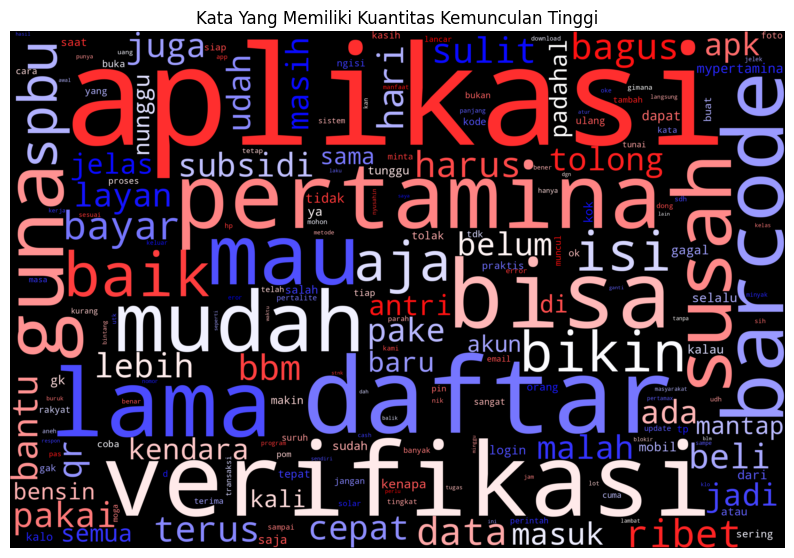

In [29]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


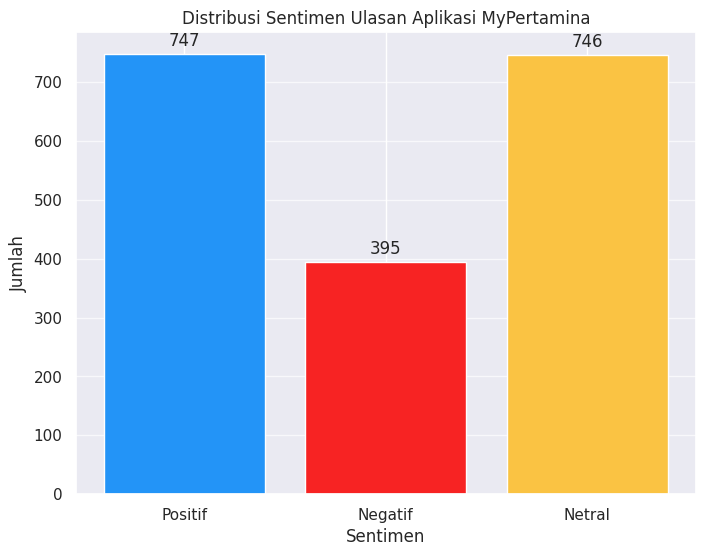

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MyPertamina")


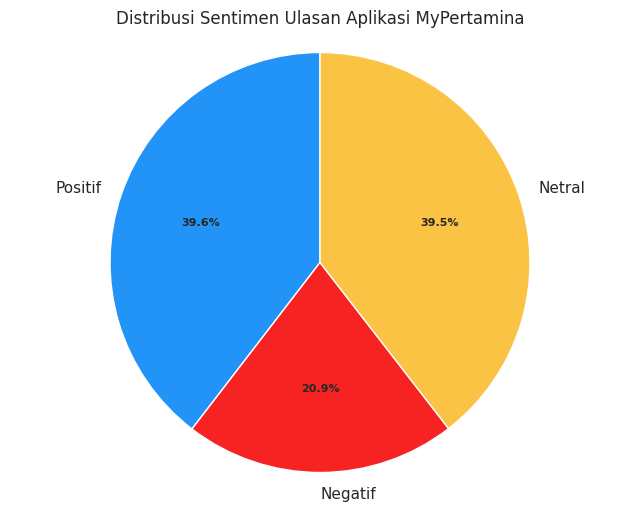

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MyPertamina")

In [32]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...,Positif
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...,Negatif
3,baik,Okay.,Positif
4,good,good,Positif
5,ribet luar biasa daftar kendara bagi photo stn...,Amazing list of vehicles for the photo stnk al...,Negatif
...,...,...,...
1880,aplikasi bumn jelek jalan baik jadi salah mulu...,Bad bumn application is running well so it's w...,Negatif
1881,tiap mau ngisi pake my pertamina jawab selalu ...,Whenever you want to fill it with my pertamine...,Negatif
1884,gagal masuk,failed to get in.,Negatif
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.,Negatif


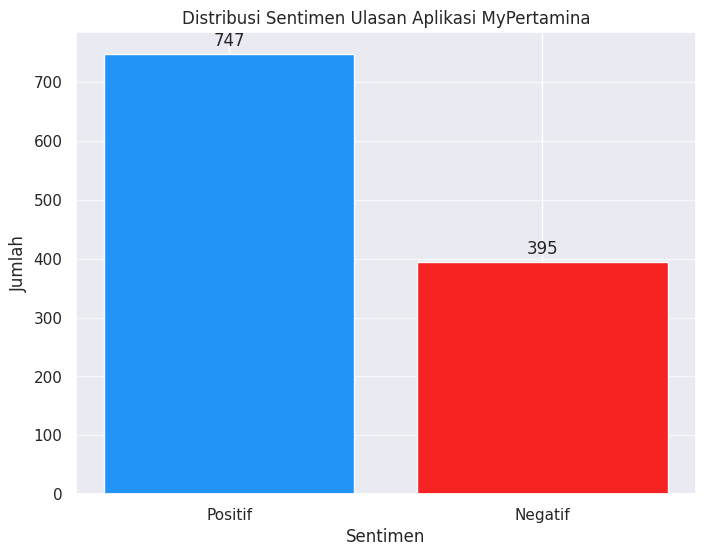

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MyPertamina")


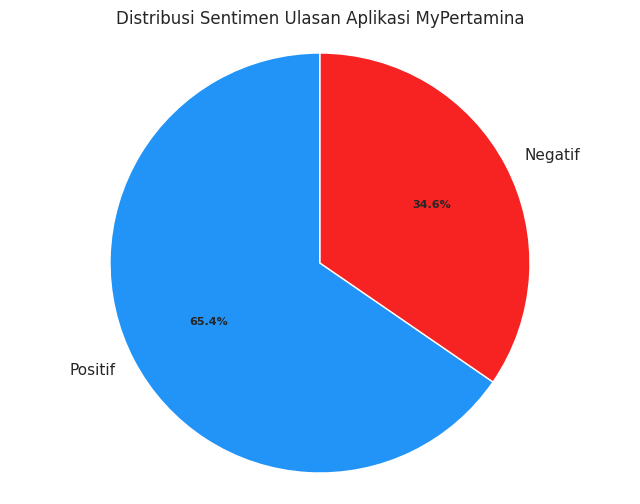

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MyPertamina")

In [42]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,kali daftar balik ke awal daftar lagiverifikas...,times back to the top of the list of reverific...,0
2,baru daftar upload ktp terang nik lihat gagal ...,new upload list ktp light ik see failed contin...,1
3,baik,Okay.,0
4,good,good,0
5,ribet luar biasa daftar kendara bagi photo stn...,Amazing list of vehicles for the photo stnk al...,1
...,...,...,...
1880,aplikasi bumn jelek jalan baik jadi salah mulu...,Bad bumn application is running well so it's w...,1
1881,tiap mau ngisi pake my pertamina jawab selalu ...,Whenever you want to fill it with my pertamine...,1
1884,gagal masuk,failed to get in.,1
1885,jelek masak verifikasi sampek tahun,It's bad. Cooked the verification until the year.,1


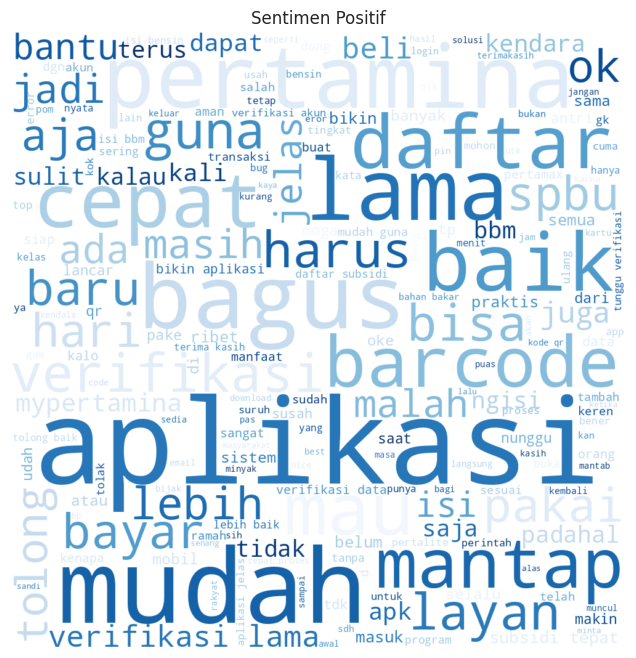

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

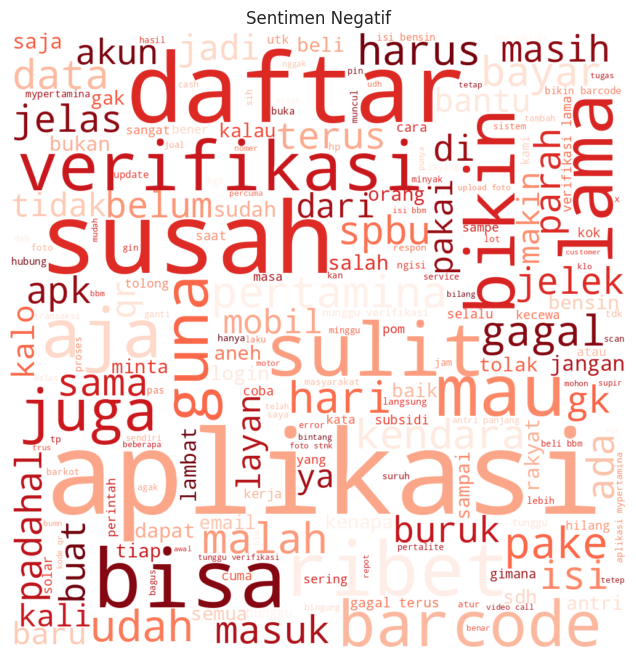

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

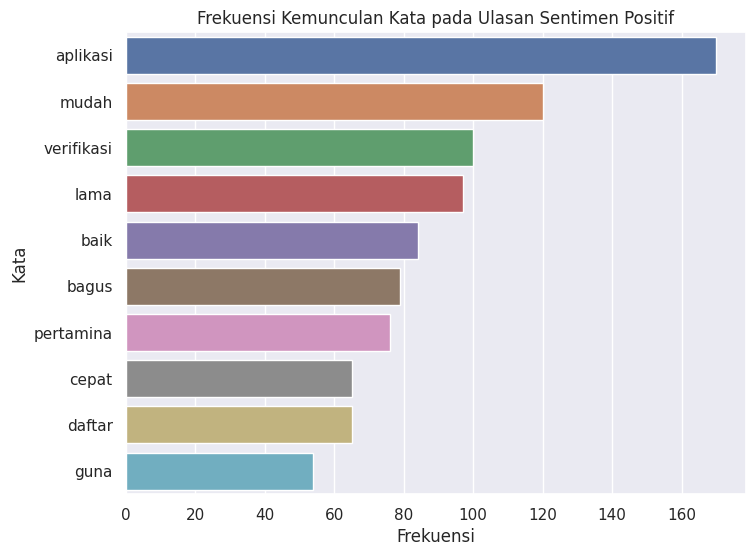

In [45]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [46]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

      kata  frekuensi
  aplikasi        170
     mudah        120
verifikasi        100
      lama         97
      baik         84
     bagus         79
 pertamina         76
     cepat         65
    daftar         65
      guna         54


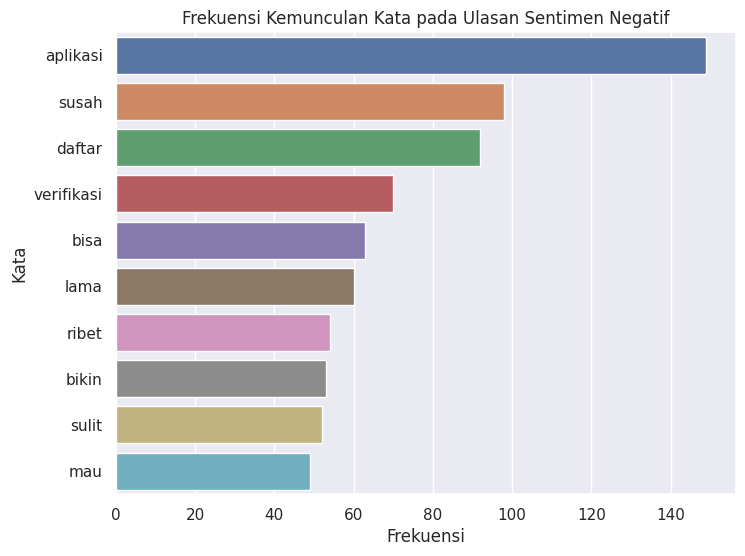

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

      kata  frekuensi
  aplikasi        149
     susah         98
    daftar         92
verifikasi         70
      bisa         63
      lama         60
     ribet         54
     bikin         53
     sulit         52
       mau         49


In [49]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,747
1,395


# **Transormation & Data Preparation**

In [50]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

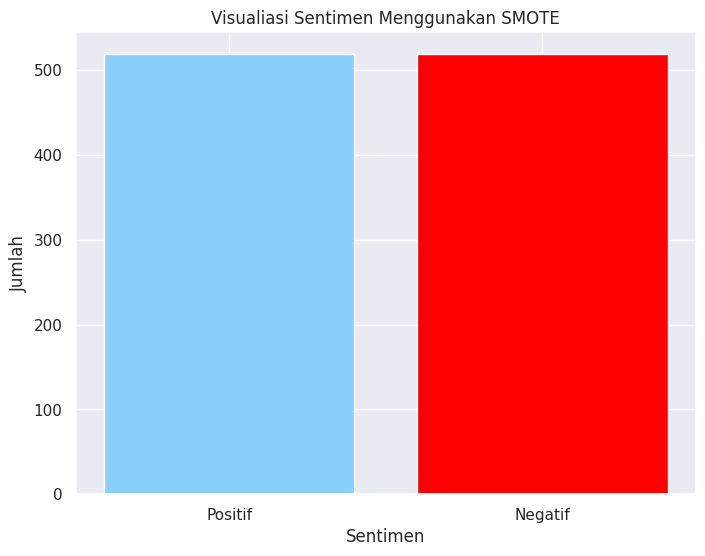

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [54]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [55]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8134110787172012
Akurasi untuk c = 0.05: 0.8309037900874635
Akurasi untuk c = 0.25: 0.8104956268221575
Akurasi untuk c = 0.5: 0.8017492711370262
Akurasi untuk c = 0.75: 0.7988338192419825
Akurasi untuk c = 1: 0.7988338192419825


In [57]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [58]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7988338192419825 


In [59]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.7988

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       228
           1       0.70      0.70      0.70       115

    accuracy                           0.80       343
   macro avg       0.77      0.78      0.77       343
weighted avg       0.80      0.80      0.80       343



In [60]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[193  35]
 [ 34  81]]

True Positives (TP) =  193

True Negatives (TN) =  81

False Positives (FP) =  35

False Negatives (FN) =  34

Accuracy =  0.7988338192419825


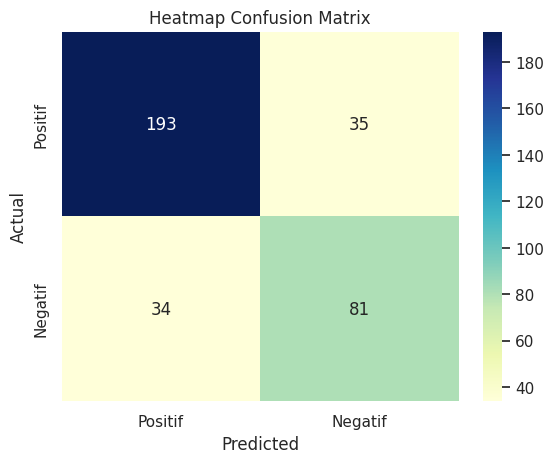

In [61]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [62]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [63]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7988


In [64]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2012


# **Testing**

In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Parah ya, kita bolak balik ngisi harus buka barcode, tapi tiap mendaftarkan kendaraan di bagian foto stnk dan body mobil ga bisa d klik, berkali2, ganti hape jga sama, berarti bukan karena jaringan, tapi karena aplikasi nya belum siap launch tapi dah di terapkan, jadinya merepotkan sekali. Sampe sekarang tidak bisa isi bensin padahal kendaraan kita pake buat jualan.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 93.28%
Probabilitas: 93.27939175584739 %


In [67]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi mantab, sangat berguna, dan sangat membantu kami para penggelut usaha jasa transportasi, walau email saya ttp tidak di balas, tapi sudah ada perbaikan. mantab semoga service dapat di pertahankan, saya puas
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 62.03%
Probabilitas: 62.029392013688664 %
